In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

In [2]:
w0 = np.random.uniform(-0.25, 0.25)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
original_omega = [w0, w1, w2]
print ('The original weights: ', original_omega)

The original weights:  [-0.04565627457856625, -0.27500173496887026, 0.5153517525974147]


In [3]:
S = 2 * np.random.rand(1000,2) - 1
S0 = []
S1 = []
for i in S:
    if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
            S1.append([i[0]] + [i[1]] + [0])
    elif (i[0]*w1)+(i[1]*w2) < 0:
            S0.append([i[0]] + [i[1]] + [1])
dataset = S0 + S1

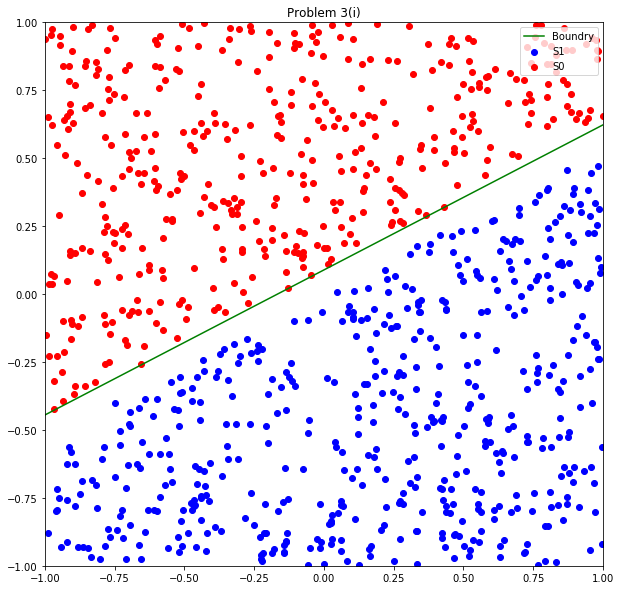

In [4]:
x1 = -(w0-w2)/w1
x2 = -(w0+w2)/w1
X = np.array([x1, x2])
Y = np.array([-1.0, +1.0])

S1_x = []
S1_y = []
S0_x = []
S0_y = []

for i in S0:
    S0_x.append(i[0])
    S0_y.append(i[1])
for i in S1:
    S1_x.append(i[0])
    S1_y.append(i[1])

fig, ax = plt.subplots(figsize=(10,10))
blue = plt.scatter(S0_x, S0_y, c ='b', label='S1')
red = plt.scatter(S1_x, S1_y, c='r', label='S0')
line = ax.plot(X, Y, c = 'green', label='Boundry')
plt.title('Problem 3(i)')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

In [5]:
def activation_fn(x):
    if x >= 0:
        y = 1
    else:
        y = 0
    return y

In [6]:
w0_1 = np.random.uniform(-1, 1)
w1_1 = np.random.uniform(-1, 1)
w2_1 = np.random.uniform(-1, 1)

omega = []
omega = [w0_1, w1_1, w2_1]

def misclassified(dataset, omega):
    misclassifications = 0
    for each in dataset:
        y = (omega[0]+(each[0]*omega[1])+(each[1]*omega[2]))
        y = activation_fn(y)
        if y != each[2]:
            misclassifications = misclassifications +1
    return misclassifications
a = misclassified(dataset, omega)
print ('Number of misclassifications: ', a)

Number of misclassifications:  425


In [7]:
def perceptron_training(omega):
    epoch = 0
    omegas = []
    missed = []
    while (misclassified(dataset,omega)!=0):
        missed.append(misclassified(dataset,omega))
        #print ('Number of missclassifications: ', missed[epoch])
        epoch = epoch + 1
        #print ('Epoch Number: ', epoch)
        for each in range(len(dataset)):
            y = omega[0] + (dataset[each][0]*omega[1]) + (dataset[each][1]*omega[2])
            y = activation_fn(y)
            updated_input =[1]+dataset[each][0:2]
            desired_output = dataset[each][2]
            difference = desired_output-y
            if difference != 0:
                updated_input[0]= updated_input[0]*learning_rate*difference
                updated_input[1]= updated_input[1]*learning_rate*difference
                updated_input[2]= updated_input[2]*learning_rate*difference
                omega[0] = omega[0]+updated_input[0]
                omega[1] = omega[1]+updated_input[1]
                omega[2] = omega[2]+updated_input[2]
        #print ('Updated weights: ', omega)
        omegas.append(omega)
    final_misclassification = misclassified(dataset,omega)
    #print ('Number of missclassifications: ', final_misclassification)
    print ('Final weights: ', omegas[-1])
    return omegas, missed

Initial weight:  [-0.4101136308131621, -0.8619229006260085, -0.6418673446774581]
Final weights:  [0.5898863691868379, 3.8973950145435268, -7.4835475878348356]


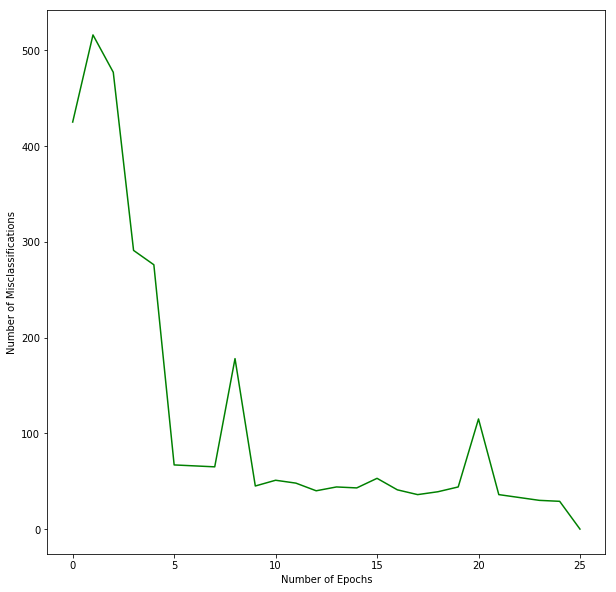

In [8]:
learning_rate = 1
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weight:  [-0.4101136308131621, -0.8619229006260085, -0.6418673446774581]
Final weights:  [9.589886369186836, 56.413091186611943, -105.8610265970585]


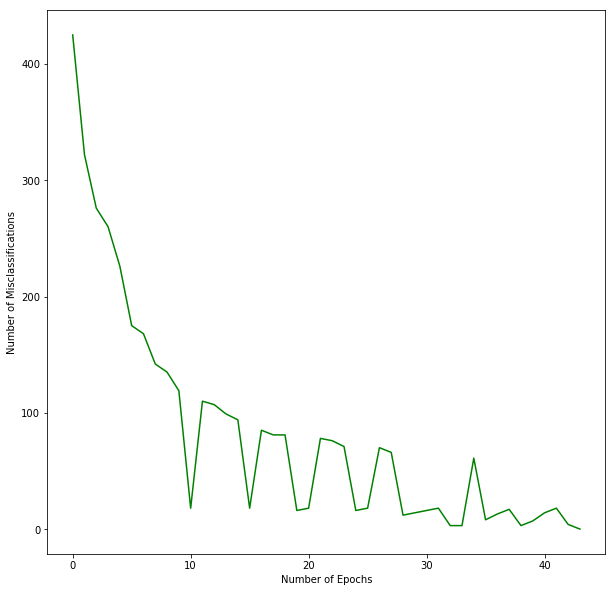

In [9]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 10
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weight:  [-0.4101136308131621, -0.8619229006260085, -0.6418673446774581]
Final weights:  [0.08988636918683796, 0.57492070309652288, -1.0549940993980185]


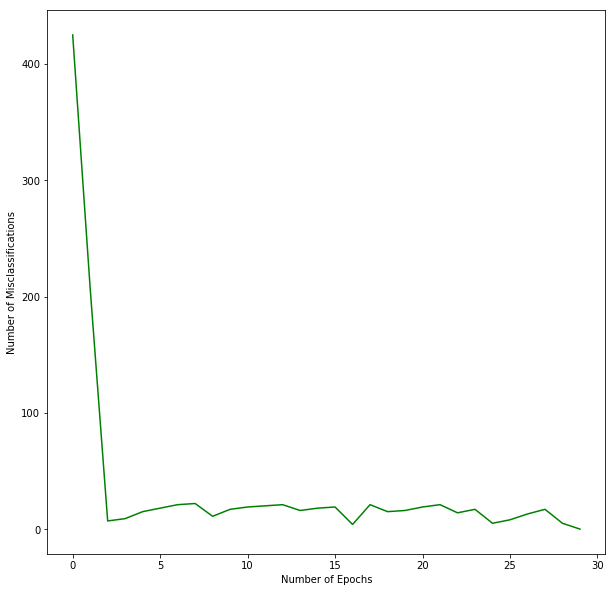

In [10]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 0.1
print ('Initial weight: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

#### Generally, as the value of learning rate increases the number of epochs required to converge increases. If the learning rate is small, the weights will be updated in a more ordered manner and we will not see a lot of noise.

#### The results would more or less be the same even with different inputs but we cannot be 100% that we will get the same result.

#### As expected the number of epochs required for convergence increases as the size of the dataset increases. You can also see the inference about the number of epochs and learning rate holds in this case as well.